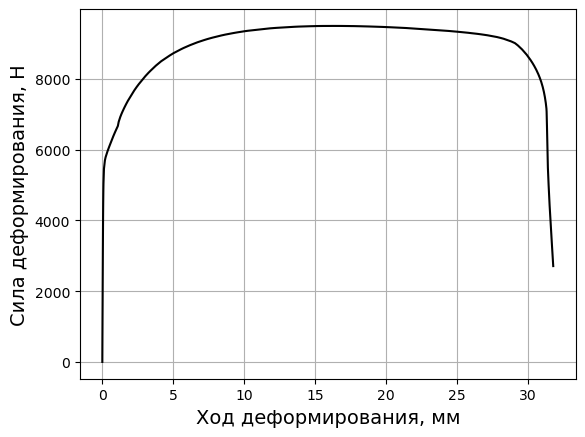

In [20]:
import math
import matplotlib.pyplot as plt
# Размеры образца
b0 = 20 #ширина
L0 = 80 #начальная длина 
a0 = 1.5 #толщина
stroke = []
force = []

with open ('C:/Jupiter/JupiterWork/load_stroke_data.txt', 'r') as f:
    for line in f:     
            str_, frc_ = map(float, line.split('\t'))
            stroke.append(str_)
            force.append(frc_)
            #print (str_)

plt.plot (stroke, force, '-', color = 'black')
plt.xlabel('Ход деформирования, мм', fontsize = 14)
plt.ylabel('Сила деформирования, Н', fontsize = 14)
plt.grid()


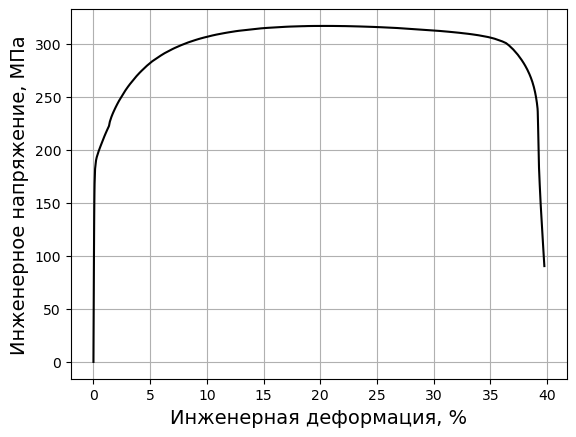

In [21]:


A0 = b0*a0

eng_stress = []
eng_strain = []
for i in range (0, len(force)):
    eng_stress.append (force[i]/A0)
    eng_strain.append ((stroke[i]/L0)*100)

plt.plot (eng_strain, eng_stress,'-', color = 'black')
plt.xlabel('Инженерная деформация, %', fontsize = 14)
plt.ylabel('Инженерное напряжение, МПа', fontsize = 14)
plt.grid()

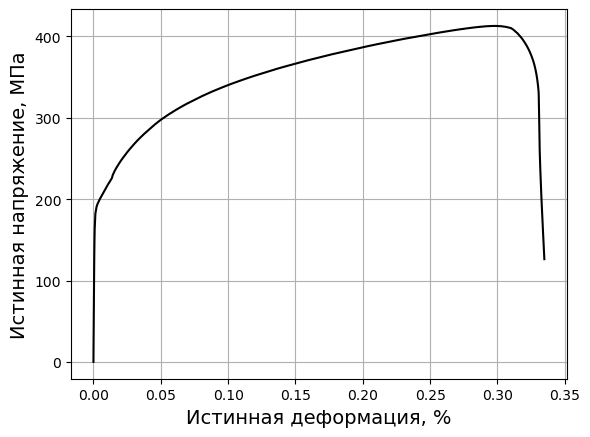

In [32]:
#Расчет истинных напряжений и деформаций
true_stress = []
true_strain = []

for i in range (0, len (force)):
    true_stress.append(eng_stress[i]*(1+eng_strain[i]/100))
    true_strain.append(math.log(1+eng_strain[i]/100))
plt.plot (true_strain, true_stress, '-', color = 'black')
plt.xlabel('Истинная деформация, %', fontsize = 14)
plt.ylabel('Истинная напряжение, МПа', fontsize = 14)
plt.grid()

In [33]:
Rm = 0
for i in range (1, len(eng_stress)):
    if eng_stress[i]> Rm:
        Rm = eng_stress[i]
        i_Rm = i
print(f'Предел текучести = {round(Rm, 3)}МПа, при i = {i_Rm}')

Предел текучести = 316.736МПа, при i = 4162


In [16]:
# Расчет равномерного удлинния
E = 210000 # модуль Юнга для стали принято брать 210 000 МПа
Ag = eng_strain[i_Rm] - (Rm/E)*100
print (f'Равномерное удлинение Ag = {round(Ag,3)}%')

Равномерное удлинение Ag = 20.434%


In [36]:
# Сохранение данных истинное напряжение - истинная деформация в текстовый файл
# Имя и путь к файлу
filename = "C:/Jupiter/JupiterWork/true_stress_strain"

# Записываем в файл, используя индексы
with open(filename, 'w') as f:              # открываем файл для записи
    for i in range(len (true_stress)):      # запускаем цикл от 0 до длины списка epsilon_true 
        eps = true_stress[i]               
        sig = true_strain[i]                 
        f.write(f"{eps}\t{sig}\n")          # построчно записываем значения переменых epsilon_true[i] и sigma_true[i] в файл
                                            # здесь '\t' означает знак табуляции, '\n' - знак перехода на новую строку